# Imports

In [49]:
import pandas as pd
import geopandas as gpd
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [50]:
raw_df_full = gpd.read_file("datasets/4_fe/df_full.gpkg")
raw_df_fe = gpd.read_file("datasets/4_fe/df_fe.gpkg")
raw_df_low_vif = gpd.read_file("datasets/4_fe/df_low_vif.gpkg")

In [51]:
df_full = raw_df_full.copy()
df_fe = raw_df_fe.copy()
df_low_vif = raw_df_low_vif.copy()

# With all predictors, coordinates included

In [52]:
title = pd.DataFrame(data = {"All predictors"}).reset_index(drop = True)

In [53]:
pred_df = df_full.copy()
pred_df["x_coord"] = pred_df["geometry"].x
pred_df["y_coord"] = pred_df["geometry"].y
pred_df = pred_df.drop(columns = ["very_good_health", "geometry"])
predictors = pred_df.columns

In [54]:
vif_data_all = pd.DataFrame()
vif_data_all["Feature"] = predictors.values
vif_data_all["VIF"] = [vif(pred_df.values, i) for i in range (pred_df.shape[1])]

In [55]:
vif_data_all = pd.concat([title, vif_data_all])
vif_data_all.to_csv("outputs/vif/vif_data.csv", index=False)

# With all predictors, coordinates removed

In [56]:
title = pd.DataFrame(data = {"Without coordinates"}).reset_index(drop = True)

In [57]:
pred_df = df_full.copy()
pred_df = pred_df.drop(columns = ["very_good_health", "geometry"])
predictors = pred_df.columns

In [58]:
vif_data_no_coords = pd.DataFrame()
vif_data_no_coords["Feature"] = predictors.values
vif_data_no_coords["VIF"] = [vif(pred_df.values, i) for i in range (pred_df.shape[1])]

c:\Users\Natha\Dev\irp\.venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [59]:
vif_data_no_coords = pd.concat([title, vif_data_no_coords])
vif_data_no_coords.to_csv("outputs/vif/vif_data.csv", mode = "a", index = False, header = False)

# With feature engineering for age, gender, and ethnicity predictors

In [60]:
title = pd.DataFrame(data = {"With feature engineering"}).reset_index(drop = True)

In [61]:
pred_df = df_fe.copy()
pred_df = pred_df.drop(columns = ["very_good_health", "geometry"])
predictors = pred_df.columns

In [62]:
vif_data_fe = pd.DataFrame()
vif_data_fe["Feature"] = predictors.values
vif_data_fe["VIF"] = [vif(pred_df.values, i) for i in range (pred_df.shape[1])]

In [63]:
vif_data_fe = pd.concat([title, vif_data_fe])
vif_data_fe.to_csv("outputs/vif/vif_data.csv", mode = "a", index = False, header = False)

In [64]:
fe_corrs = pred_df.corr()

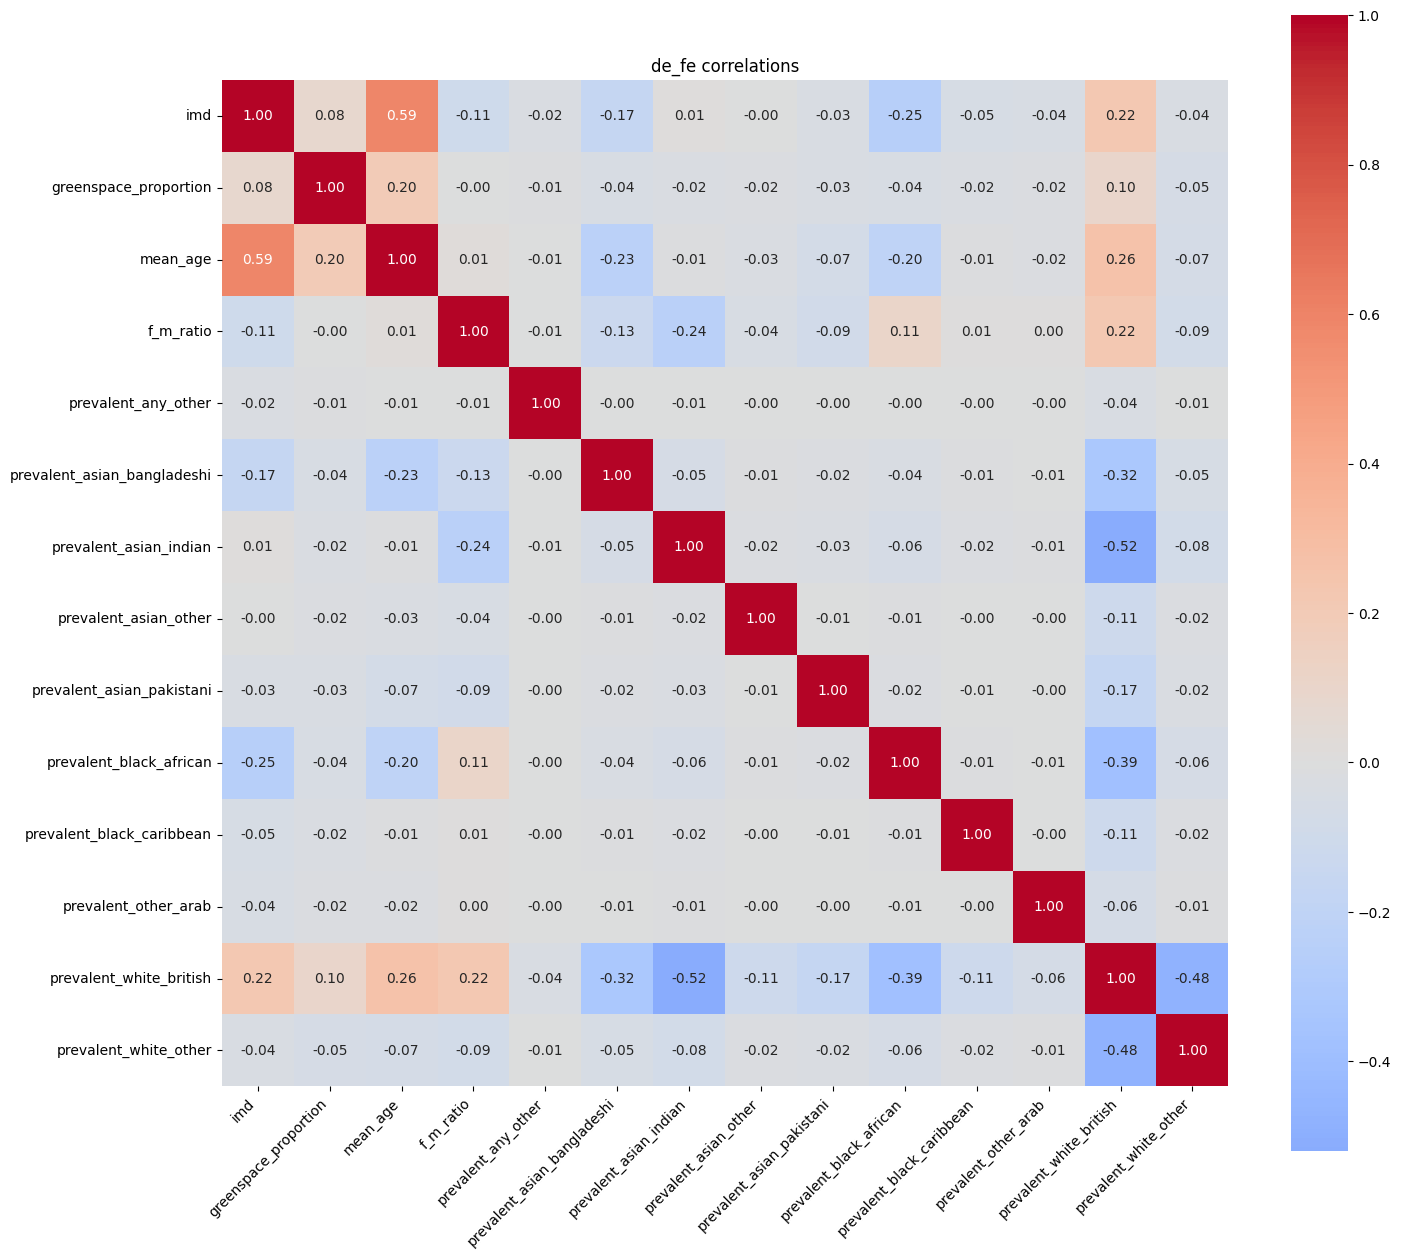

In [65]:
plt.figure(figsize=(15, 15))
sns.heatmap(fe_corrs, annot=True, cmap="coolwarm", center=0, 
            square=True, fmt=".2f", cbar_kws={"shrink": 0.8})
plt.title("de_fe correlations")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("outputs/plots/df_fe_correlations.png")

# With feature engineering, high VIF ethnicity predictors removed

In [66]:
title = pd.DataFrame(data = {"Without high VIF ethnicity cols"}).reset_index(drop = True)

In [ ]:
pred_df = df_fe.copy()
pred_df = pred_df.drop(columns = ["very_good_health", "geometry", "prevalent_asian_indian", "prevalent_black_african", "prevalent_white_british", "prevalent_white_other"])
predictors = pred_df## ## Casdsd## asdasdasdfsdfgfsdbfdgbsasdasdasdasd

In [68]:
vif_data_low_vif_ethnicity = pd.DataFrame()
vif_data_low_vif_ethnicity["Feature"] = predictors.values
vif_data_low_vif_ethnicity["VIF"] = [vif(pred_df.values, i) for i in range (pred_df.shape[1])]

In [69]:
vif_data_low_vif_ethnicity = pd.concat([title, vif_data_low_vif_ethnicity])
vif_data_low_vif_ethnicity.to_csv("outputs/vif/vif_data.csv", mode = "a", index = False, header = False)

# With feature engineering, high VIF ethnicity + mean age predictors removed

In [70]:
title = pd.DataFrame(data = {"Without mean age"}).reset_index(drop = True)

In [71]:
pred_df = df_low_vif.copy()
pred_df = pred_df.drop(columns = ["very_good_health", "geometry"])
predictors = pred_df.columns

In [72]:
vif_data_low_vif = pd.DataFrame()
vif_data_low_vif["Feature"] = predictors.values
vif_data_low_vif["VIF"] = [vif(pred_df.values, i) for i in range (pred_df.shape[1])]

In [73]:
vif_data_low_vif = pd.concat([title, vif_data_low_vif])
vif_data_low_vif.to_csv("outputs/vif/vif_data.csv", mode = "a", index = False, header = False)

In [74]:
low_vif_corrs = pred_df.corr()

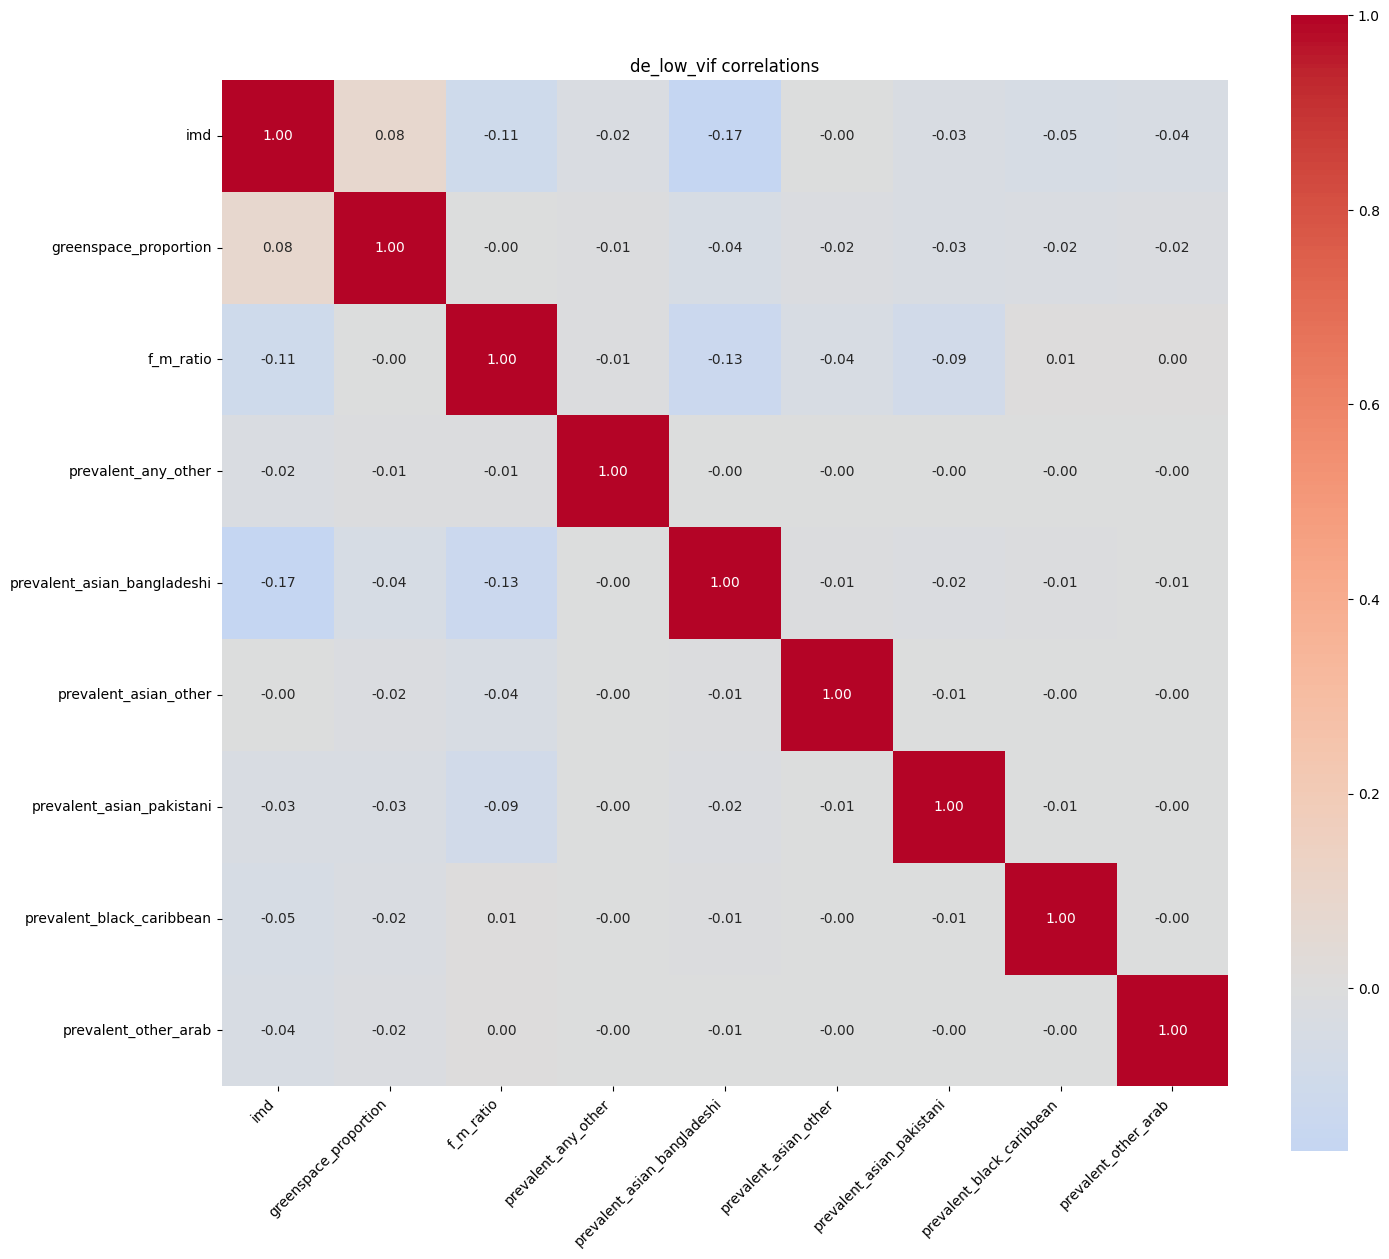

In [75]:
plt.figure(figsize=(15, 15))
sns.heatmap(low_vif_corrs, annot=True, cmap="coolwarm", center=0, 
            square=True, fmt=".2f", cbar_kws={"shrink": 0.8})
plt.title("de_low_vif correlations")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("outputs/plots/df_fe_correlations.png")

# Ethnicity correlations

In [76]:
ethnicity_cols = ["white_british", "white_irish", "white_other", "white_gypsy/irish_traveller", "white_roma", "asian_bangladeshi", "asian_indian", "asian_pakistani", "asian_chinese", "asian_other","black_african", "black_caribbean", "black_other", "mixed_white_and_asian", "mixed_white_and_black_african", "mixed_white_and_black_caribbean", "mixed_other", "other_arab", "any_other"]

In [77]:
ethnicity_corrs = df_full[ethnicity_cols].corr()

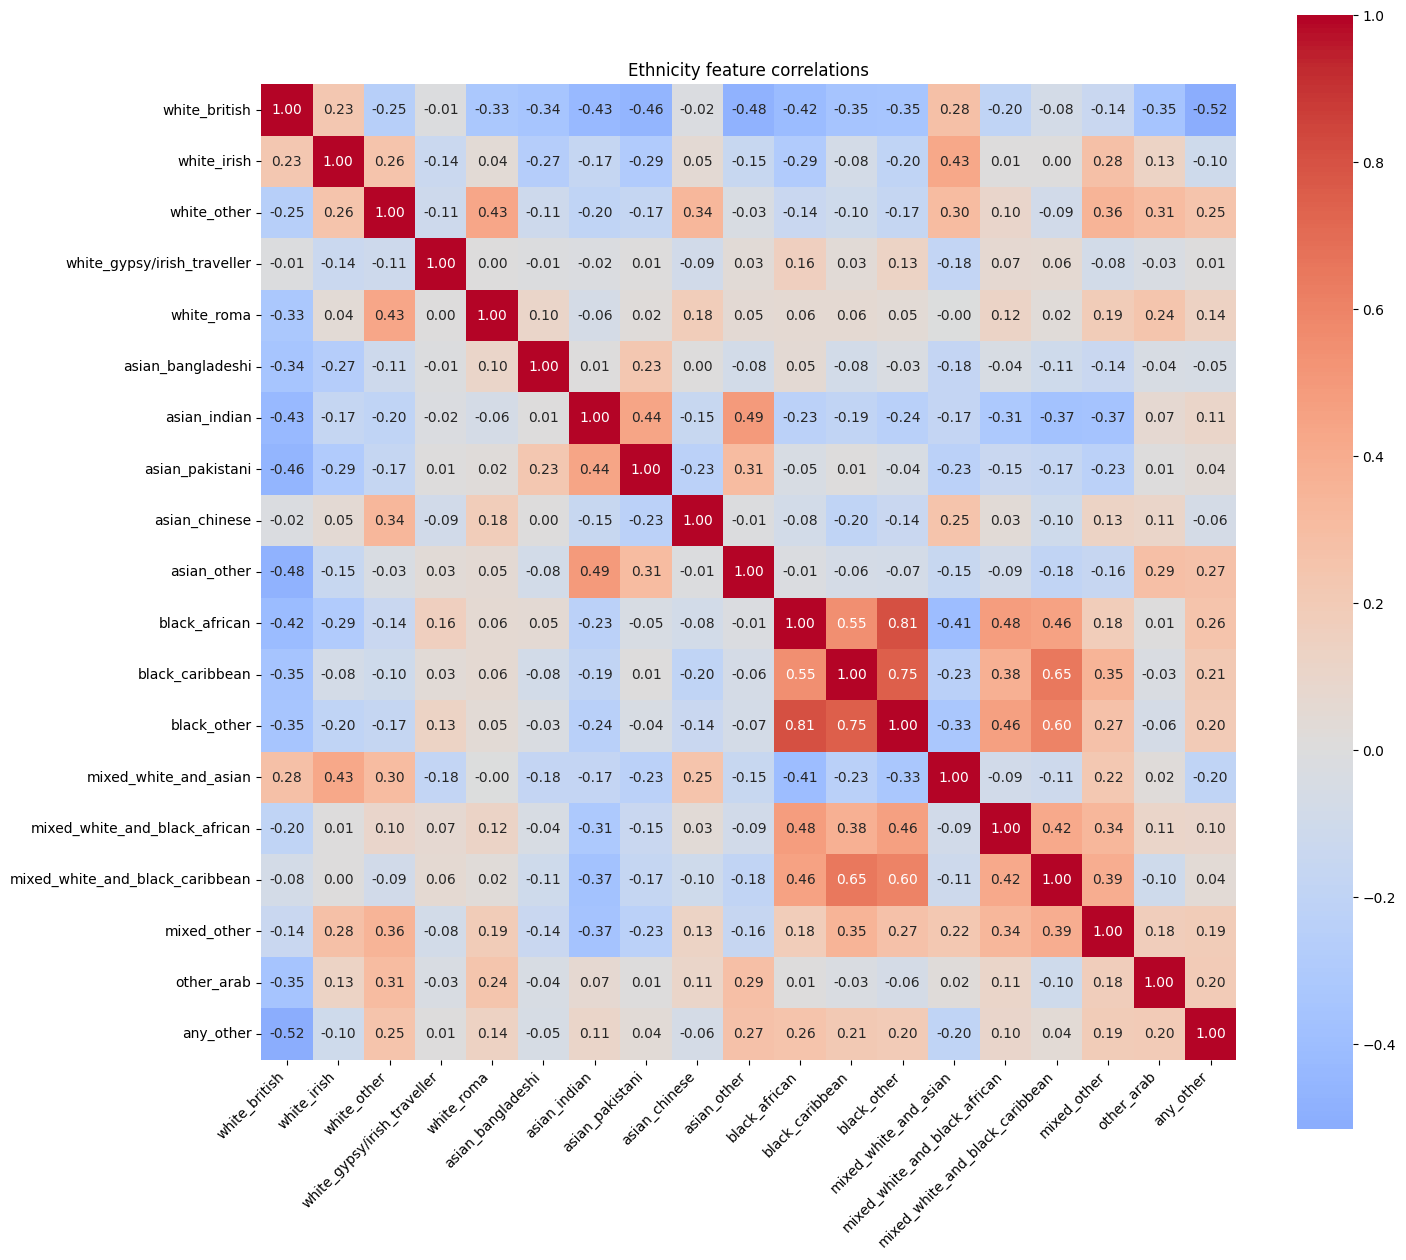

In [78]:
plt.figure(figsize=(15, 15))
sns.heatmap(ethnicity_corrs, annot=True, cmap="coolwarm", center=0, 
            square=True, fmt=".2f", cbar_kws={"shrink": 0.8})
plt.title("Ethnicity feature correlations")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("outputs/plots/ethnicity_correlations.png")